<a href="https://colab.research.google.com/github/csabajozsef/adatviz/blob/main/First_look_at_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import pandas as pd
import numpy as np

In [48]:
%matplotlib notebook

In [49]:
df_edges = pd.read_csv('DATA/large_twitch_edges.csv')
df_nodes = pd.read_csv('DATA/large_twitch_features.csv')

In [50]:
df_edges.head()

,numeric_id_1,numeric_id_2
0,98343,141493
1,98343,58736
2,98343,140703
3,98343,151401
4,98343,157118


In [51]:
df_edges.shape

(6797557, 2)

In [52]:
df_nodes.head()

,views,mature,life_time,created_at,updated_at,numeric_id,dead_account,language,affiliate
0,7879,1,969,2016-02-16,2018-10-12,0,0,EN,1
1,500,0,2699,2011-05-19,2018-10-08,1,0,EN,0
2,382502,1,3149,2010-02-27,2018-10-12,2,0,EN,1
3,386,0,1344,2015-01-26,2018-10-01,3,0,EN,0
4,2486,0,1784,2013-11-22,2018-10-11,4,0,EN,0


In [53]:
df_nodes.shape

(168114, 9)

In [54]:
df_nodes.dtypes

views            int64
mature           int64
life_time        int64
created_at      object
updated_at      object
numeric_id       int64
dead_account     int64
language        object
affiliate        int64
dtype: object

In [55]:
# binary/categorical data - count 

In [56]:
df_nodes.columns

Index(['views', 'mature', 'life_time', 'created_at', 'updated_at',
       'numeric_id', 'dead_account', 'language', 'affiliate'],
      dtype='object')

In [57]:
df_for_value_counts = df_nodes[['mature','dead_account', 'language', 'affiliate']]

In [58]:
df_for_value_counts.apply(pd.Series.value_counts)

,mature,dead_account,language,affiliate
0,89081.0,162955.0,NaN,86568.0
1,79033.0,5159.0,NaN,81546.0
CS,NaN,NaN,576.0,NaN
DA,NaN,NaN,503.0,NaN
DE,NaN,NaN,9428.0,NaN
EN,NaN,NaN,124411.0,NaN
ES,NaN,NaN,5699.0,NaN
FI,NaN,NaN,652.0,NaN
FR,NaN,NaN,6799.0,NaN
HU,NaN,NaN,427.0,NaN


In [59]:
# languag percentage
df_for_value_counts['language'].value_counts(normalize=True)*100

EN       74.003950
DE        5.608099
FR        4.044279
ES        3.389962
RU        2.867697
ZH        1.682192
PT        1.508500
OTHER     0.850018
JA        0.789345
IT        0.731646
KO        0.722724
PL        0.561524
SV        0.507989
TR        0.459212
NL        0.416979
FI        0.387832
TH        0.375935
CS        0.342625
DA        0.299202
HU        0.253994
NO        0.196295
Name: language, dtype: float64

In [60]:
# df_nodes.groupby(['language']).agg({'language':['count']}).sort_values([('language','count')],ascending=True)
# multi-level indexing

In [61]:
# chechking if all pairs are different in the edge dataset: 
# use the pandas groupby size() function to count the number of rows in each group of a groupby object
df_edges.groupby(['numeric_id_1','numeric_id_2']).size()

# df_edges.groupby(['numeric_id_1','numeric_id_2']).size().reset_index(name = 'counts')
# df_edges.groupby(['numeric_id_1','numeric_id_2']).agg({'numeric_id_2':['count']})
# df_edges.groupby(['numeric_id_1','numeric_id_2']).count()

numeric_id_1  numeric_id_2
0             10464           1
              38806           1
              53471           1
              59443           1
              96866           1
                             ..
168112        163534          1
              164247          1
              164996          1
              165661          1
              166575          1
Length: 6797557, dtype: int64

In [62]:
# degrees for each node
df_of_degrees = df_edges.groupby(['numeric_id_1']).count().sort_values(['numeric_id_2'], ascending=False)
df_of_degrees

,numeric_id_2
numeric_id_1,
61862,35208
125642,31036
32338,30463
71050,29905
110345,22601
...,...
129346,1
19246,1
107161,1


In [63]:
# not all the nodes are included in 
# node num: 168.114

In [64]:
df_of_degrees['numeric_id_2'].describe()

count    123518.000000
mean         55.032926
std         350.330796
min           1.000000
25%           3.000000
50%           9.000000
75%          30.000000
max       35208.000000
Name: numeric_id_2, dtype: float64

In [65]:
df_of_degrees[df_of_degrees['numeric_id_2']>55]

,numeric_id_2
numeric_id_1,
61862,35208
125642,31036
32338,30463
71050,29905
110345,22601
...,...
143212,56
160280,56
97426,56


<IPython.core.display.Javascript object>


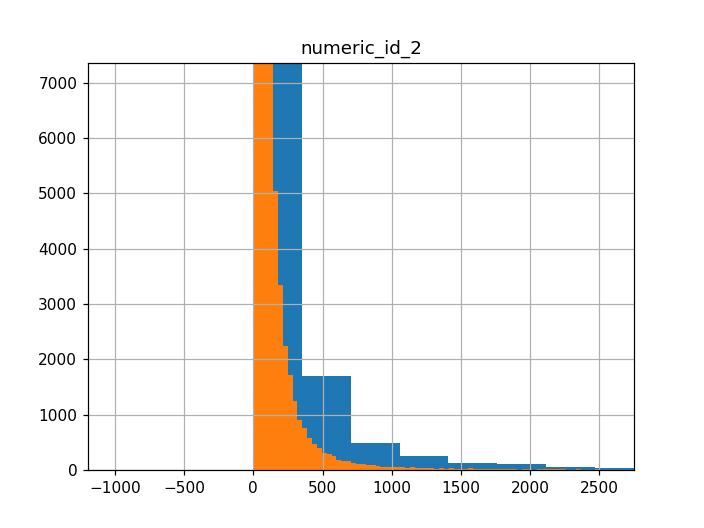

In [66]:
hist = df_of_degrees.hist(bins=100)

In [67]:
df_edges.shape

(6797557, 2)

In [68]:
# node num: 168.114
# nodes in edgeslist left and right:

In [69]:
df_edges['numeric_id_2'].unique().size

167934

In [70]:
df_edges['numeric_id_1'].unique().size

123518

In [71]:
df_edges.head()

,numeric_id_1,numeric_id_2
0,98343,141493
1,98343,58736
2,98343,140703
3,98343,151401
4,98343,157118


In [72]:
df_group_one = df_edges.groupby('numeric_id_1').count().sort_index()
df_group_one

,numeric_id_2
numeric_id_1,
0,9
1,49
2,20
4,5
5,20
...,...
168106,56
168107,9
168108,10


In [73]:
df_group_two = df_edges.groupby('numeric_id_2').count().sort_index()
df_group_two

,numeric_id_1
numeric_id_2,
0,34
1,229
2,102
3,11
4,28
...,...
168109,39
168110,1
168111,15


In [74]:
df_group_two.index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            168104, 168105, 168106, 168107, 168108, 168109, 168110, 168111,
            168112, 168113],
           dtype='int64', name='numeric_id_2', length=167934)

In [75]:
# outer_merged = pd.merge(df_group_one, df_group_two, how="outer", on=["numeric_id_1"])
# outer_merged.head(10) # indexen kellene joinolni

In [76]:
outer_merged_with_concat = pd.concat([df_group_one, df_group_two], axis=1)
outer_merged_with_concat
# ahol Nan szerepelt ott csak az egyik él oszlopban szerepelt a node
# Nan szám = összes node - groupone - group2

,numeric_id_2,numeric_id_1
0,9.0,34.0
1,49.0,229.0
2,20.0,102.0
3,NaN,11.0
4,5.0,28.0
...,...,...
168109,4.0,39.0
168110,NaN,1.0
168111,NaN,15.0
168112,207.0,33.0


In [77]:
df_nodes.shape

(168114, 9)

In [78]:
outer_merged_with_concat.isna().sum().sum()

44776

In [79]:
(168114-167934) + (168114-123518)

44776

In [80]:
# outer_merged_with_concat['degrees'] = outer_merged_with_concat['numeric_id_1']+ outer_merged_with_concat['numeric_id_2']
outer_merged_with_concat["degrees"] = outer_merged_with_concat.sum(axis=1, skipna = True)
outer_merged_with_concat

,numeric_id_2,numeric_id_1,degrees
0,9.0,34.0,43.0
1,49.0,229.0,278.0
2,20.0,102.0,122.0
3,NaN,11.0,11.0
4,5.0,28.0,33.0
...,...,...,...
168109,4.0,39.0,43.0
168110,NaN,1.0,1.0
168111,NaN,15.0,15.0
168112,207.0,33.0,240.0


In [81]:
hist = outer_merged_with_concat['degrees'].hist(bins=1000)
hist

<AxesSubplot:title={'center':'numeric_id_2'}>

In [82]:
outer_merged_with_concat['degrees'].describe(percentiles=[0.25, 0.5, *[i/100 for i in range(75,96,5)],*[i/1000 for i in range(990,999,1)]]).T

count    168114.000000
mean         80.868423
std         314.162731
min           1.000000
25%          13.000000
50%          32.000000
75%          75.000000
80%          92.000000
85%         118.000000
90%         162.000000
95%         264.000000
99%         741.000000
99.1%       795.000000
99.2%       855.192000
99.3%       934.209000
99.4%      1045.000000
99.5%      1175.435000
99.6%      1374.000000
99.7%      1681.322000
99.8%      2195.740000
max       35279.000000
Name: degrees, dtype: float64

In [83]:
outer_merged_with_concat.describe(percentiles=[0.25, 0.5, *[i/100 for i in range(75,96,5)],*[i/1000 for i in range(990,999,1)]]).T

,count,mean,std,min,25%,50%,75%,80%,85%,90%,...,99%,99.1%,99.2%,99.3%,99.4%,99.5%,99.6%,99.7%,99.8%,max
numeric_id_2,123518.0,55.032926,350.330796,1.0,3.0,9.0,30.0,41.0,58.0,91.0,...,730.0,796.347,891.864,999.381,1118.0,1292.415,1551.524,1960.449,2538.66,35208.0
numeric_id_1,167934.0,40.477551,49.983290,1.0,10.0,24.0,51.0,60.0,74.0,94.0,...,240.0,247.000,257.000,268.000,281.0,296.000,318.000,343.000,379.00,1048.0
degrees,168114.0,80.868423,314.162731,1.0,13.0,32.0,75.0,92.0,118.0,162.0,...,741.0,795.000,855.192,934.209,1045.0,1175.435,1374.000,1681.322,2195.74,35279.0
